Input State: |101> (Number 5)
Applying QFT...
Input Bloch Spheres (Magnitude):


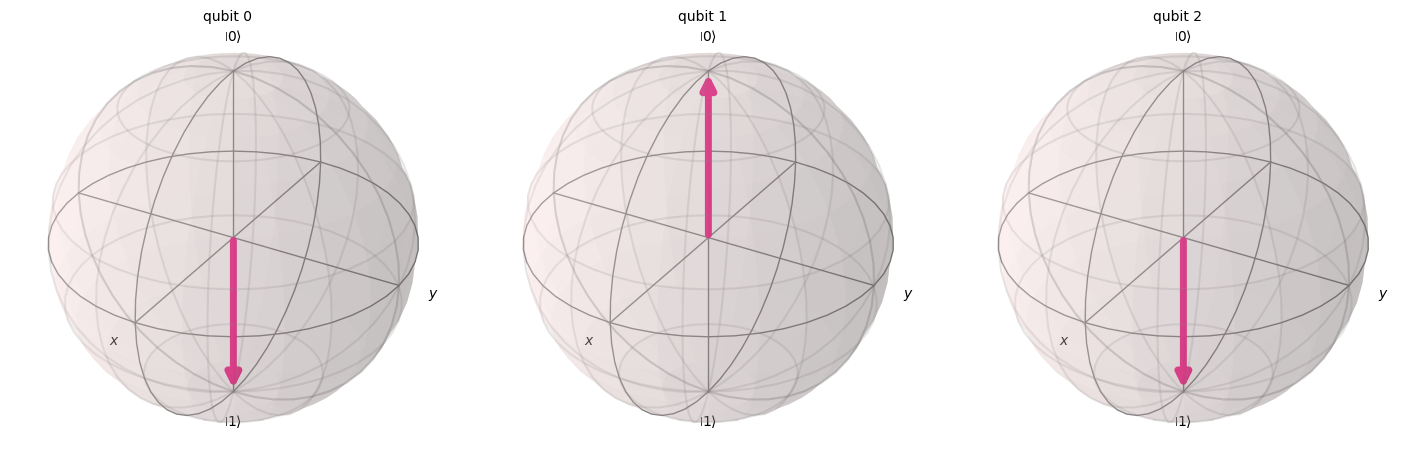


Output Bloch Spheres (Phase):


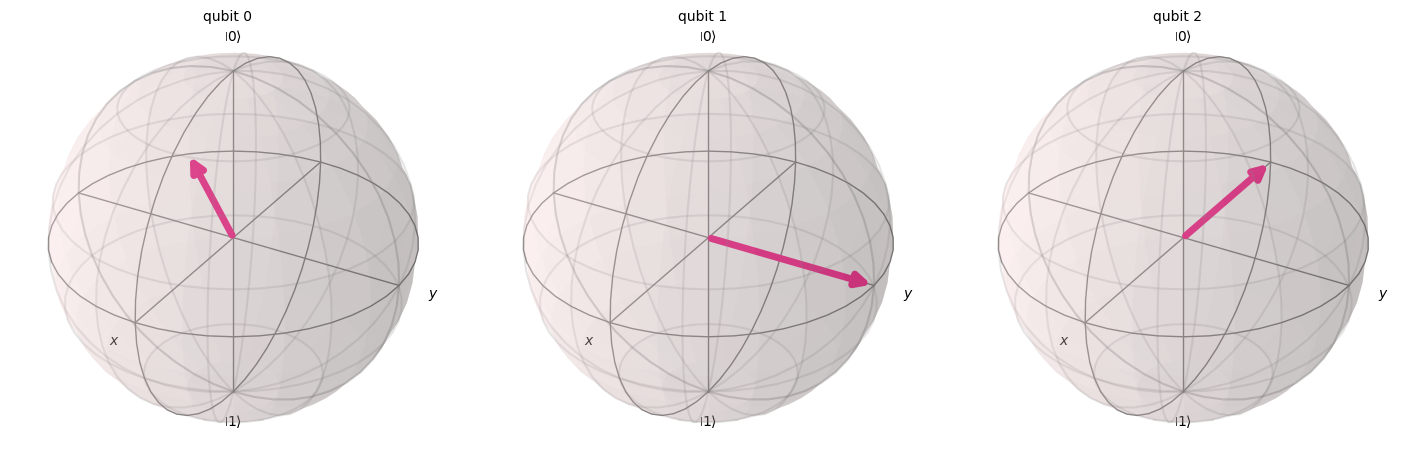

In [1]:
# --- Day 13: The Quantum Fourier Transform (QFT) ---
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector

# 1. Define the QFT Circuit for 3 Qubits
def qft_circuit(n):
    qc = QuantumCircuit(n)
    
    # --- Step A: Rotations ---
    # We loop through the qubits from top to bottom
    for i in range(n):
        qc.h(i) # Apply Hadamard
        # Apply Controlled-Phase rotations from all lower qubits
        for j in range(i+1, n):
            # The angle gets smaller: pi/2, pi/4, pi/8...
            angle = np.pi / (2**(j-i))
            qc.cp(angle, j, i) # Control is j, Target is i
            
    qc.barrier()
    
    # --- Step B: Swaps (The Bit Reversal) ---
    # The math comes out backward, so we swap the top and bottom qubits
    for i in range(n // 2):
        qc.swap(i, n - i - 1)
        
    return qc

# 2. Build the Main Experiment
n = 3
qc = QuantumCircuit(n)

# A. Prepare an Input State
# Let's encode the number 5 (Binary: 101)
# q0=1, q1=0, q2=1
qc.x(0)
qc.x(2)

print("Input State: |101> (Number 5)")
qc.save_statevector(label='input')

# B. Apply QFT
qc.append(qft_circuit(n), range(n))

print("Applying QFT...")
qc.save_statevector(label='output')

# 3. Simulate
sim = AerSimulator()
# Transpile! (Crucial for custom gates)
qc_transpiled = transpile(qc, sim)
data = sim.run(qc_transpiled, shots=1).result().data()

# 4. Visualization (The Phase Encode)
# In the input, the arrows point Up/Down (Z-basis)
print("Input Bloch Spheres (Magnitude):")
display(plot_bloch_multivector(data['input']))

# In the output, the arrows point to the Equator, but rotated!
print("\nOutput Bloch Spheres (Phase):")
display(plot_bloch_multivector(data['output']))